# Validation of the angular components of S-matrix components
In this notebook, we reproduce the figures in the classic book by van de Hulst [1]. Page 152 in the edition cited below shows scattering diagrams for various refractive indices and size parameters. The calculations presented therein are for non-absorbing spheres. Each of the curves on that page can be reproduced. The notebook allows choice of maximum $l$ in the series expansion. By chaning the $l$, one can study the number of terms required to produce a good approximation.
<br>
TODO: Scattering diagrams from Chapter 14 on absorbing spheres will be added
<br>
[[1] van de Hulst, H.C. Light Scattering by Small Particles](https://books.google.com/books?id=PlHfPMVAFRcC&printsec=frontcover#v=onepage&q&f=false)

In [2]:
import numpy as np
from numpy import exp
from math import pi
from src import mie,vsh
from matplotlib import pyplot as plt

def sampling_line(nk):
    t = np.linspace(0.001, pi, nk)
    kz = k0*np.cos(t)
    kx = k0*np.sin(t)
    kvec = np.vstack((kx,kx*0,kz)).T
    khatOUT = kvec / k0 
    return khatOUT

k0 = 2*pi
khatO = sampling_line(50)
khatI = np.array([[0.,0.,1.]])
#

In [3]:
Slist=[]
ka=6
maxL=20
for radius in [ka/2/pi]:
    S = mie.far_field_dyadic(maxL, 2., radius, khatO, khatI)
    Slist.append((radius,S))

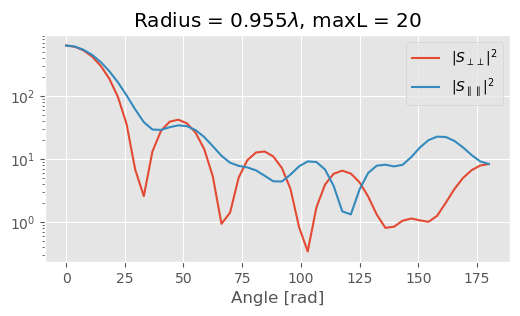

In [4]:
x = np.arccos(khatO[:,2])*180/pi

with plt.style.context('ggplot'):
    for radius,S in Slist:
        fig,ax=plt.subplots(figsize=(6,3),dpi=100)
        ax.plot(x, k0**2 * np.abs(S[:,0])**2,label='$|S_{\perp\perp}|^2$')
        ax.plot(x, k0**2 * np.abs(S[:,-1])**2,label='$|S_{\parallel\parallel}|^2$')
        ax.set_yscale('log')
        ax.set_xlabel('Angle [rad]')
        ax.legend()
        ax.set_title('Radius = {:.3f}$\lambda$, maxL = {:d}'.format(radius,maxL))

plt.show()